In [5]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from src.__init__ import ROOT_DIR
from src.features.dataset_combined import CombinedData
import warnings
warnings.filterwarnings('ignore')

In [6]:
path_to_data = [os.path.join(ROOT_DIR, 'data/nih/dataset'),
                os.path.join(ROOT_DIR, 'data/chexpert/dataset'),
                os.path.join(ROOT_DIR, 'data/brixia/')]

# Create data loaders
dataset = CombinedData(path_to_nih=path_to_data[0],
                        path_to_chexpert=path_to_data[1],
                        path_to_brixia=path_to_data[2],
                        fold='train')

In [7]:
num_finding = 0
num_no_finding = 0

tmp = dataset.datasets[0].labels[dataset.datasets[0].PRED_LABEL]
label_sum = np.sum(tmp.to_numpy(), axis=1)
num_finding += np.sum(label_sum>0)
num_no_finding += np.sum(label_sum==0)

tmp = dataset.datasets[1].labels['No Finding'].fillna(0)
num_no_finding += np.sum(tmp.to_numpy())
num_finding += (len(tmp) - np.sum(tmp.to_numpy()))

tmp = dataset.datasets[2].labels['BrixiaScoreGlobal']
num_finding += np.sum(tmp.to_numpy() > 0)
num_no_finding += np.sum(tmp.to_numpy() == 0)

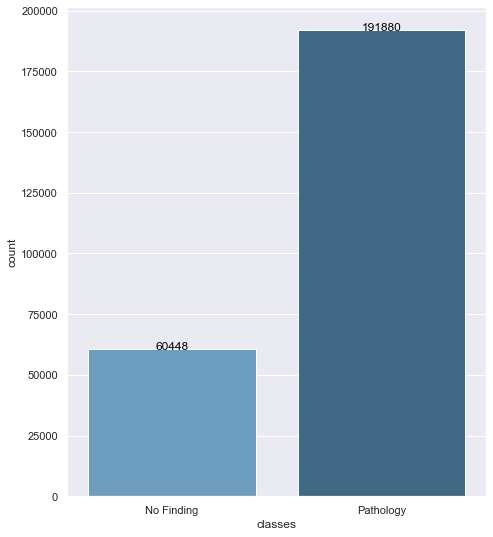

In [8]:
df = pd.DataFrame({
'classes':     ["No Finding", "Pathology"],
'count':  [int(num_no_finding), int(num_finding)],
})

sns.set(rc={'figure.figsize':(7.5,9)})
ax = sns.barplot(x='classes', y='count', data=df, palette="Blues_d")

for index, row in df.iterrows():
    ax.text(row.name, row.values[1], row.values[1], color='black', ha="center")

plt.savefig('../figures/barplot_combined_distribution', dpi=300)